In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [3]:
df=pd.read_csv("C:/Users/knowl/Downloads/Cereals (2).csv")

In [5]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


In [7]:
# Step 1: Remove all cereals with missing values
df_clean = df.dropna()
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing missing values: {df_clean.shape}")

Original dataset shape: (77, 16)
Dataset shape after removing missing values: (74, 16)


In [9]:
# Step 2: Selecting numeric columns for clustering (excluding non-numeric like cereal name)
numeric_df = df_clean.select_dtypes(include=[np.number])

In [11]:
# Step 3: Standardize the data (important before clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

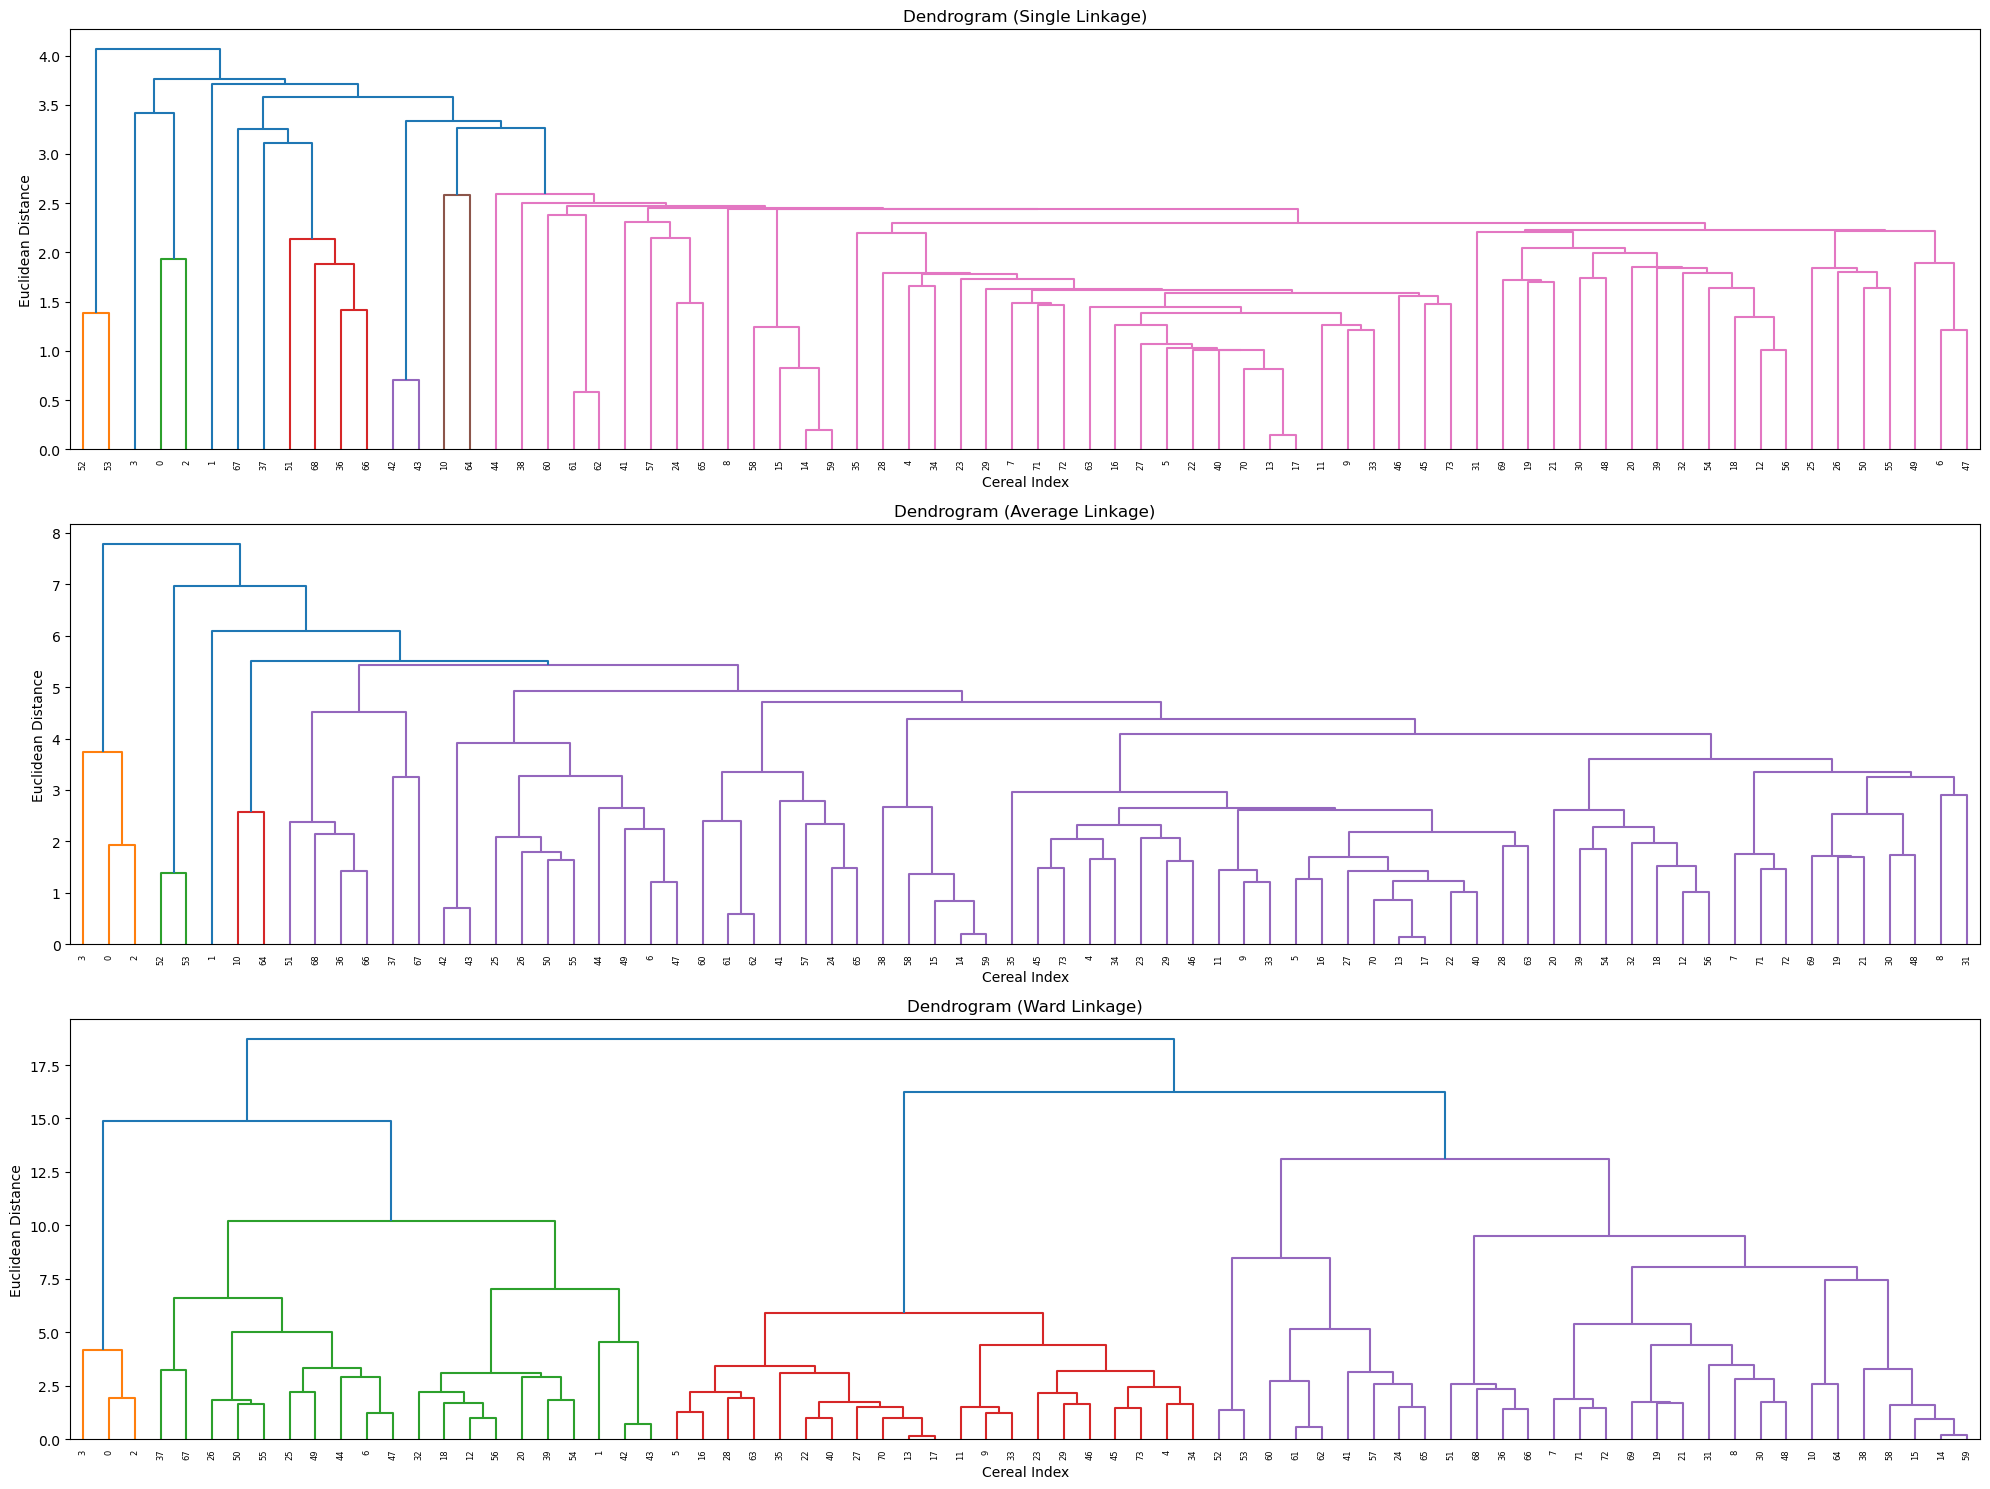

In [25]:
# Step 4: Create Dendrograms with different linkage methods
linkage_methods = ['single', 'average', 'ward']

plt.figure(figsize=(20, 15))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(3, 1, i)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    dendrogram = sch.dendrogram(sch.linkage(scaled_data, method=method))
    plt.xlabel("Cereal Index")
    plt.ylabel("Euclidean Distance")

plt.tight_layout()
plt.show()

In [27]:
# Step 5: Apply Hierarchical Clustering for each method
# Assume 3 clusters based on dendrogram inspection

# Single Linkage Clustering
single_model = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
single_labels = single_model.fit_predict(scaled_data)

In [29]:
# Average Linkage Clustering
average_model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
average_labels = average_model.fit_predict(scaled_data)

In [31]:
# Step 6: Attach Cluster labels back to dataframe
df_clean['Single_Linkage_Cluster'] = single_labels
df_clean['Average_Linkage_Cluster'] = average_labels


C:\Users\knowl\AppData\Local\Temp\ipykernel_58528\3501262297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Single_Linkage_Cluster'] = single_labels
C:\Users\knowl\AppData\Local\Temp\ipykernel_58528\3501262297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Average_Linkage_Cluster'] = average_labels


In [33]:
# Step 7: View sample results
df_clean[['Single_Linkage_Cluster', 'Average_Linkage_Cluster']].head()

,Single_Linkage_Cluster,Average_Linkage_Cluster
0,2,1
1,0,0
2,2,1
3,2,1
5,0,0


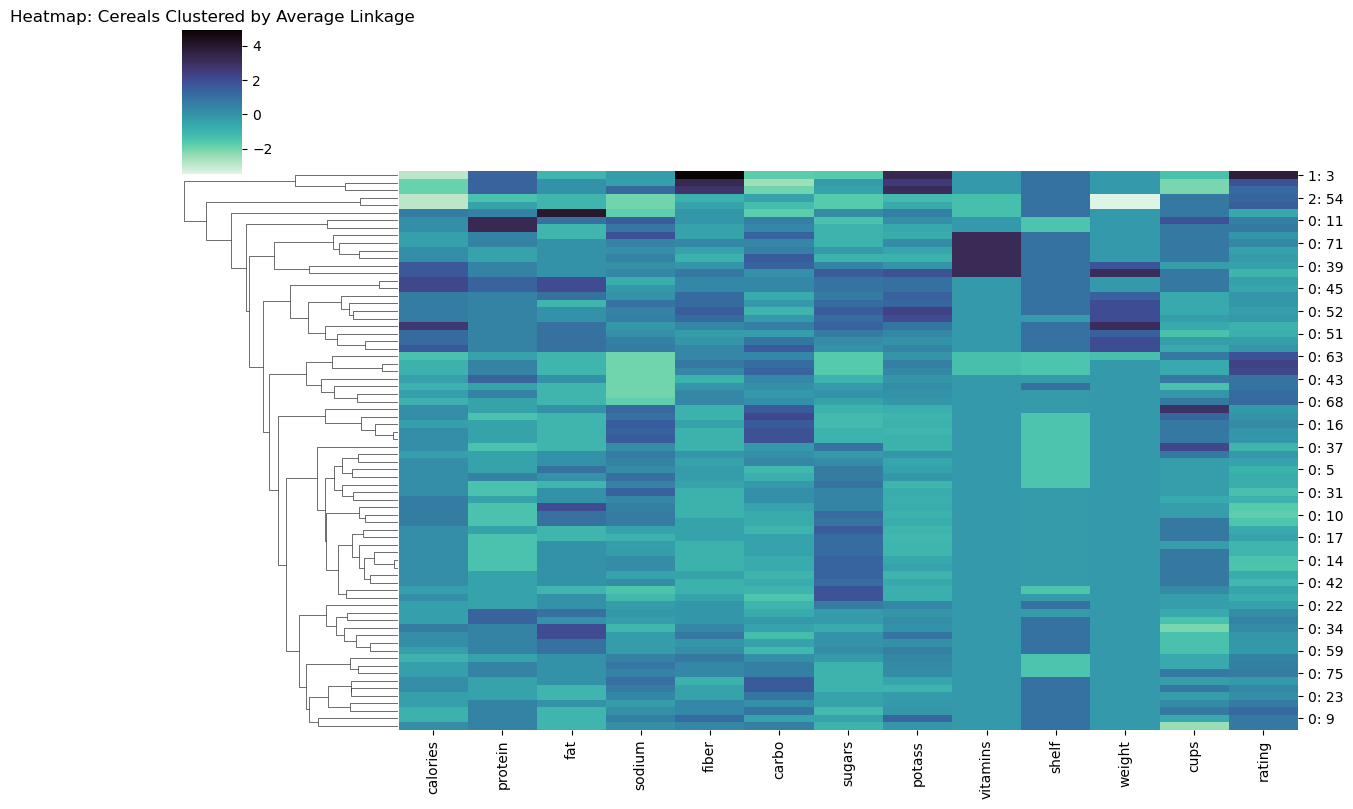

In [37]:
# Step 9: Create Heatmap for Average Linkage Clustering
# Set labels as cluster membership and cereal name
import seaborn as sns
cereal_names = df_clean['Cereal Name'] if 'Cereal Name' in df_clean.columns else df_clean.index
utilities_df_norm = pd.DataFrame(scaled_data, index=['{}: {}'.format(cluster, name) for cluster, name in zip(average_labels, cereal_names)], columns=numeric_df.columns)

# Plot heatmap
sns.clustermap(utilities_df_norm, method='average', col_cluster=False, cmap='mako_r', figsize=(12, 8))
plt.title("Heatmap: Cereals Clustered by Average Linkage")
plt.show()

WARD Linkage

In [40]:
# Apply Hierarchical Clustering for Ward Linkage

ward_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_labels = ward_model.fit_predict(scaled_data)


In [42]:
# Attach Cluster labels back to dataframe
df_clean['Ward_Linkage_Cluster'] = ward_labels

C:\Users\knowl\AppData\Local\Temp\ipykernel_58528\1887167236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ward_Linkage_Cluster'] = ward_labels


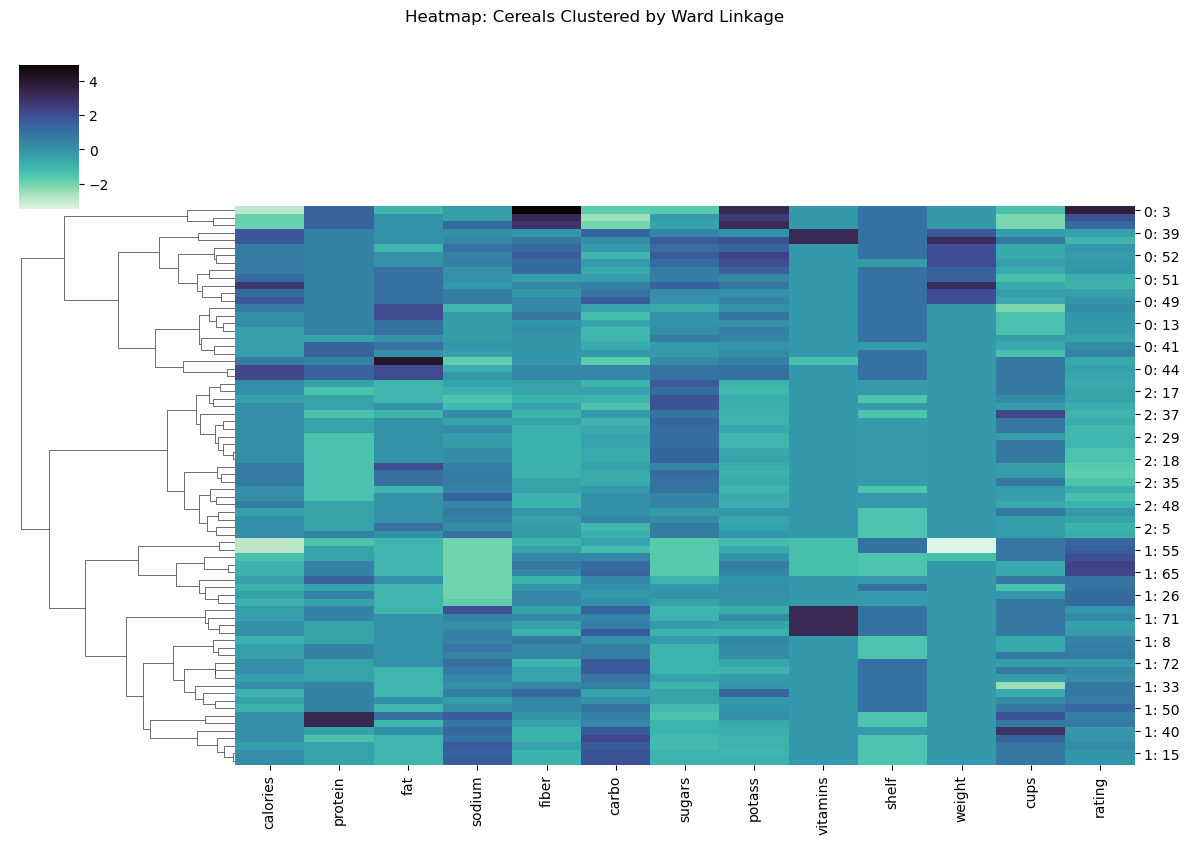

In [44]:
# Step 9: Create Heatmap for Ward Linkage Clustering
# Set labels as cluster membership and cereal name
cereal_names = df_clean['Cereal Name'] if 'Cereal Name' in df_clean.columns else df_clean.index
utilities_df_norm_ward = pd.DataFrame(scaled_data, index=['{}: {}'.format(cluster, name) for cluster, name in zip(ward_labels, cereal_names)], columns=numeric_df.columns)

# Plot heatmap
g = sns.clustermap(utilities_df_norm_ward, method='ward', col_cluster=False, cmap='mako_r', figsize=(12, 8))
g.fig.suptitle("Heatmap: Cereals Clustered by Ward Linkage", y=1.05)
plt.show()

* In Single Linkage, the clusters were not clearly separated, Many clusters.

* In Average Linkage, better cluster grouping.

* In Ward Linkage, clusters were the most natural based on real similarities.

After analyzing dendrograms, heatmaps, and cluster assignments for single, average, and ward linkage methods, it was observed that:

* Single Linkage producing weak and poorly separated clusters.

* Average Linkage provided improved clustering, forming moderately compact and balanced groups.

* Ward Linkage produced the best clustering results, creating highly compact and distinct clusters, minimizing variance within each group.

The Average Linkage method led to the most insightful and meaningful clusters, as visually confirmed by the dendrogram and heatmap.

I have taken help of GenAI to help me generate codes for clustering. 